In [1]:
# Jupyter notebook magic to reload modules
%load_ext autoreload
%autoreload 2

# Import src


In [2]:
import sys

sys.path.append(
"/home/Marc/Marc_network_sims",
)  # path to the code with the functions

# Load & Process data


numprocs=1
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/04.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/18.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/05.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/13.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/02.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/10.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/17.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/09.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/16.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/06.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/19.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/07.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/12.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/01.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/14.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/11.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/00.pkl
Loaded: ../data/Data04_Pyr_NA_Variants//NA_0.5/03.pkl
Loaded: ../data/D

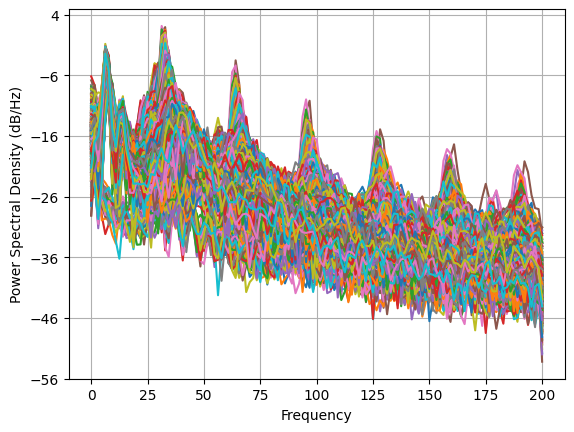

In [3]:
# # Import load function
# from src.SanjayCode import main

# # list of data paths
# data_paths = [
#     "../data/Data04_Pyr_NA_Variants/",
#     "../data/Data04_Pyr_K_Variants",
#     "../data/Data04_OLM_NA_Variants",
#     "../data/Data04_OLM_K_Variants",
#     "../data/Data04_Bwb_NA_Variants",
#     "../data/Data04_Bwb_K_Variants",
# ]

# results_by_path = main(data_paths) # Run to process the data if data is available

# Load already processed data


In [25]:
# load results_by_path.pkl
import pickle

data_path = "../Results"

with open(data_path + "/results_by_path.pkl", "rb") as f:
    results_by_path = pickle.load(f)

In [26]:
print(results_by_path.keys())
# print(results_by_path.values())

dict_keys(['../data/Data04_Pyr_NA_Variants/', '../data/Data04_Pyr_K_Variants', '../data/Data04_OLM_NA_Variants', '../data/Data04_OLM_K_Variants', '../data/Data04_Bwb_NA_Variants', '../data/Data04_Bwb_K_Variants'])


# Variant data set separation


In [5]:
# Separate the dictionary into NA and K datasets
na_datasets = {key: value for key, value in results_by_path.items() if "NA" in key}
k_datasets = {key: value for key, value in results_by_path.items() if "K" in key}

# Now you have two dictionaries, na_datasets and k_datasets
print("NA Datasets:", na_datasets.keys())
print("K Datasets:", k_datasets.keys())

NA Datasets: dict_keys(['../data/Data04_Pyr_NA_Variants/', '../data/Data04_OLM_NA_Variants', '../data/Data04_Bwb_NA_Variants'])
K Datasets: dict_keys(['../data/Data04_Pyr_K_Variants', '../data/Data04_OLM_K_Variants', '../data/Data04_Bwb_K_Variants'])


# Single Plots


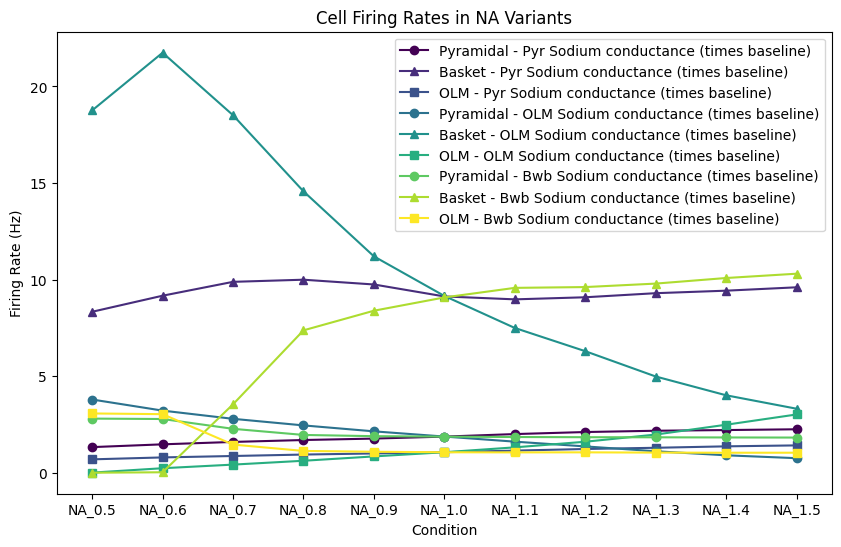

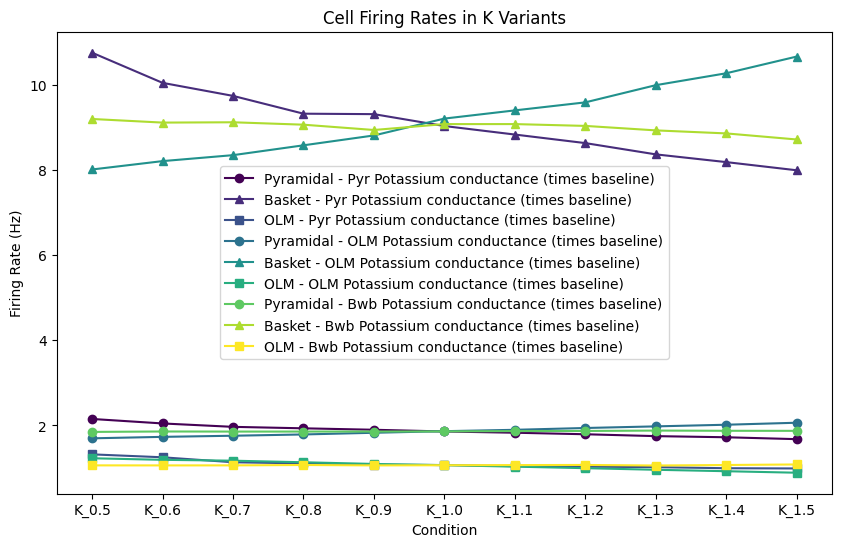

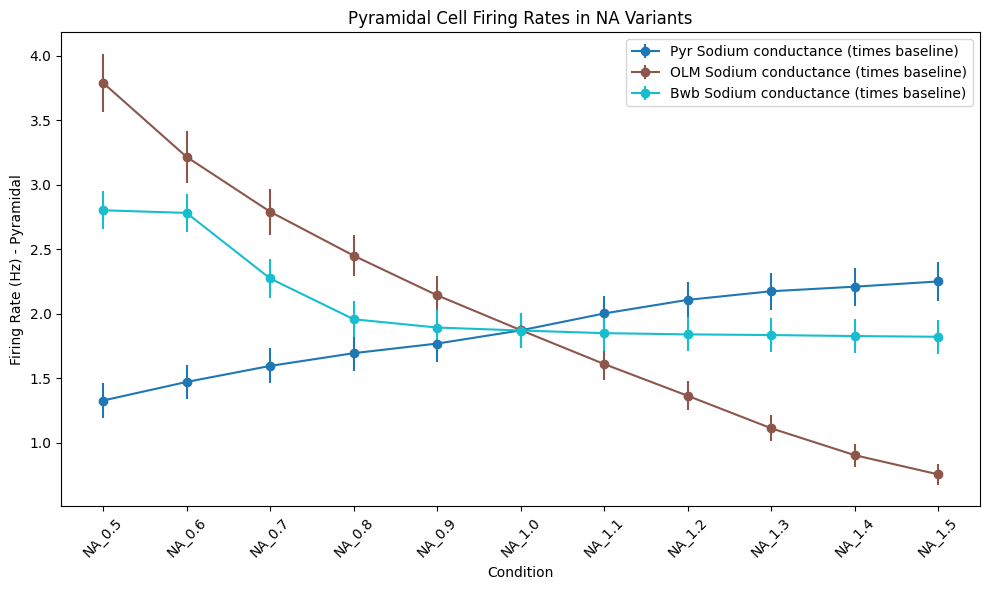

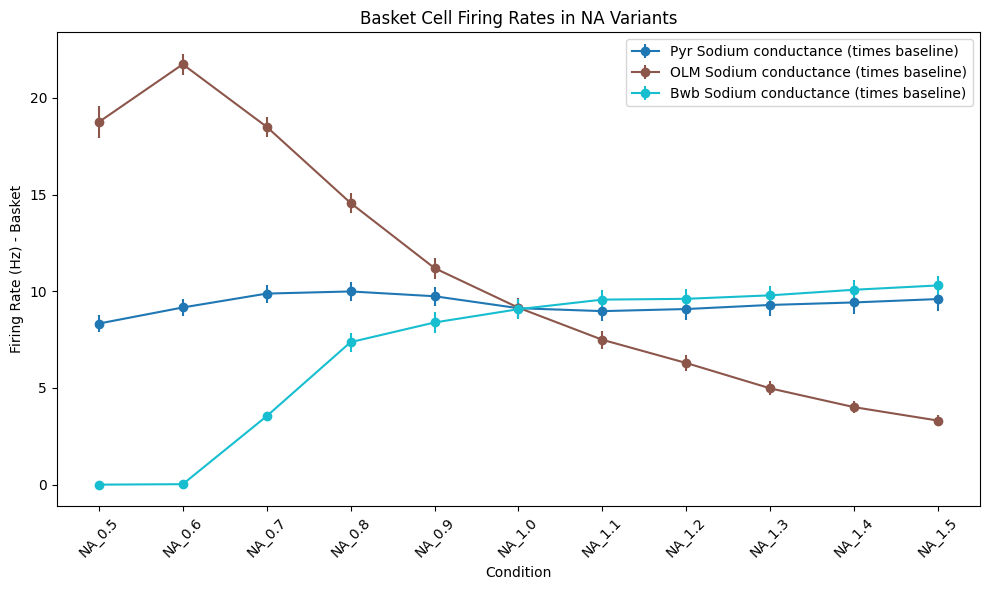

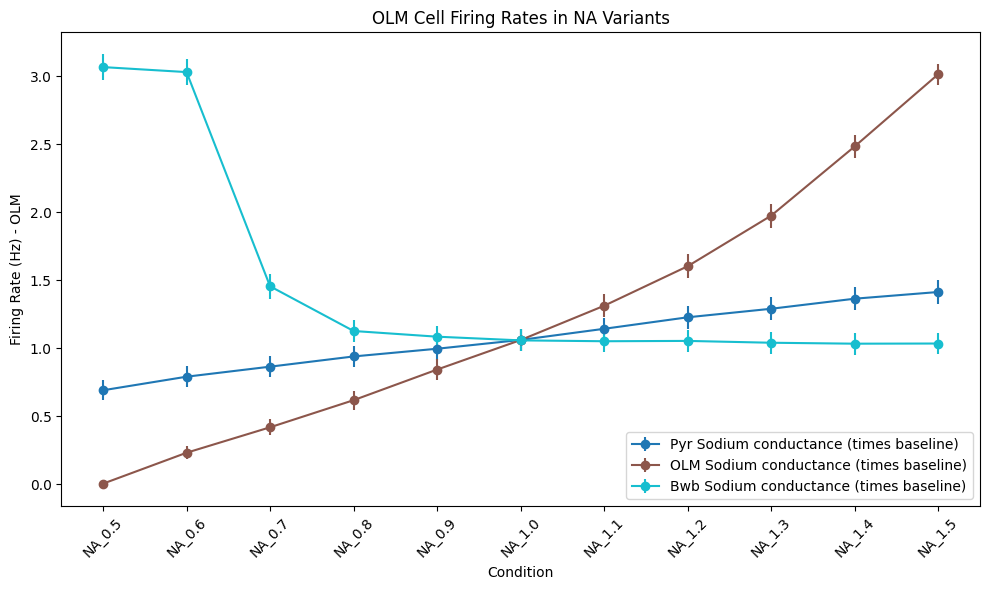

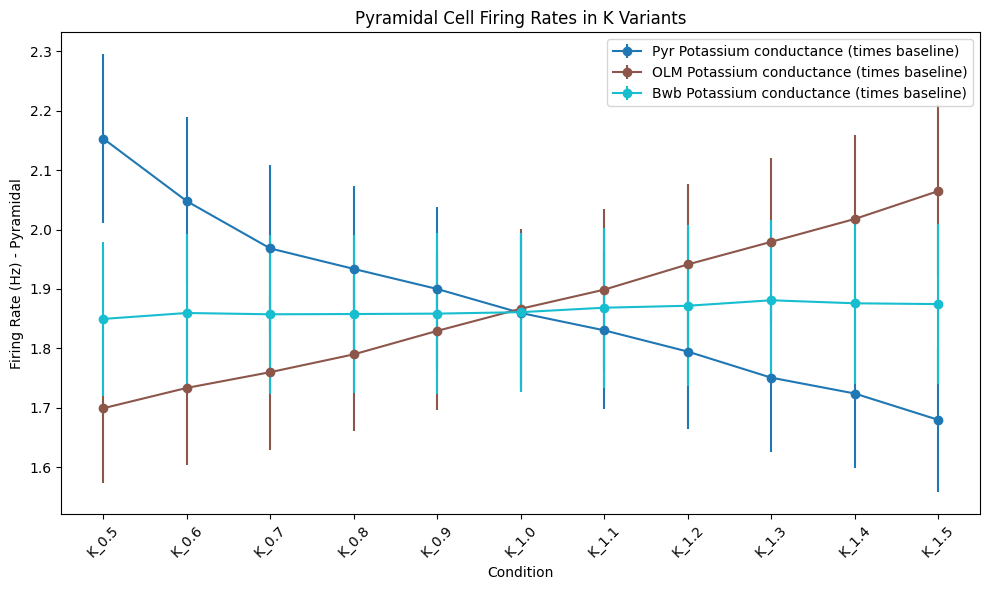

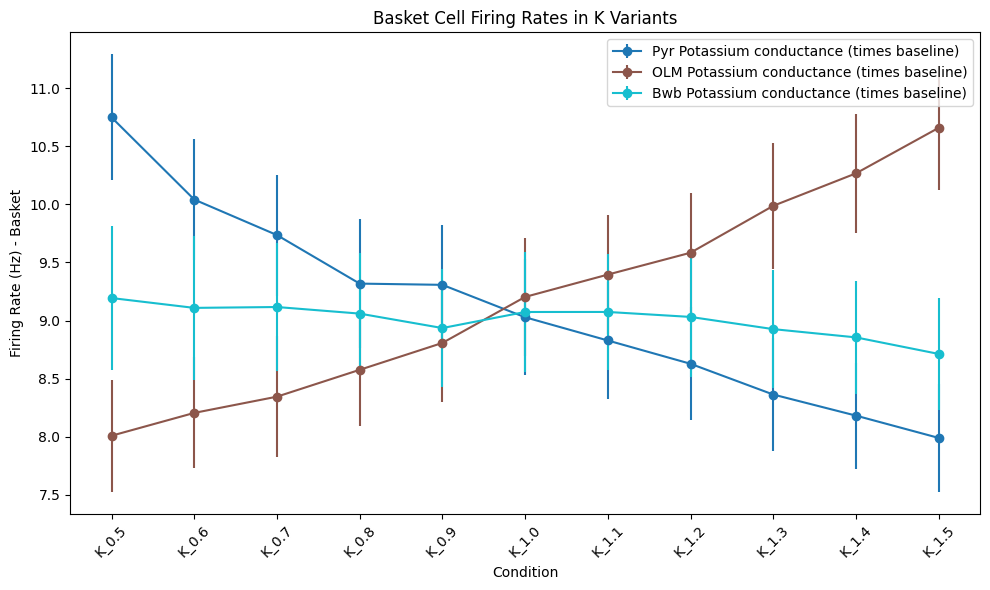

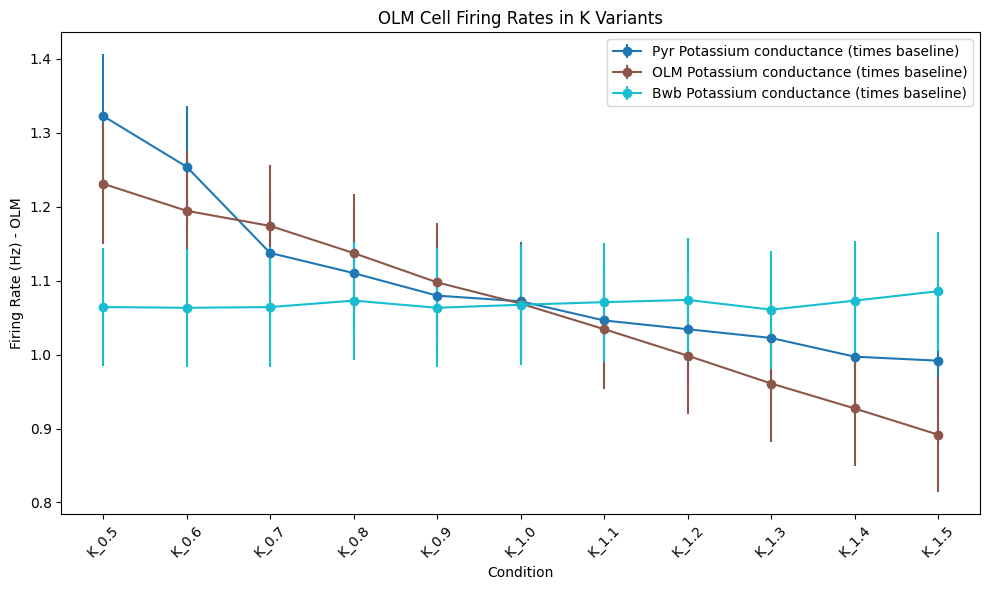

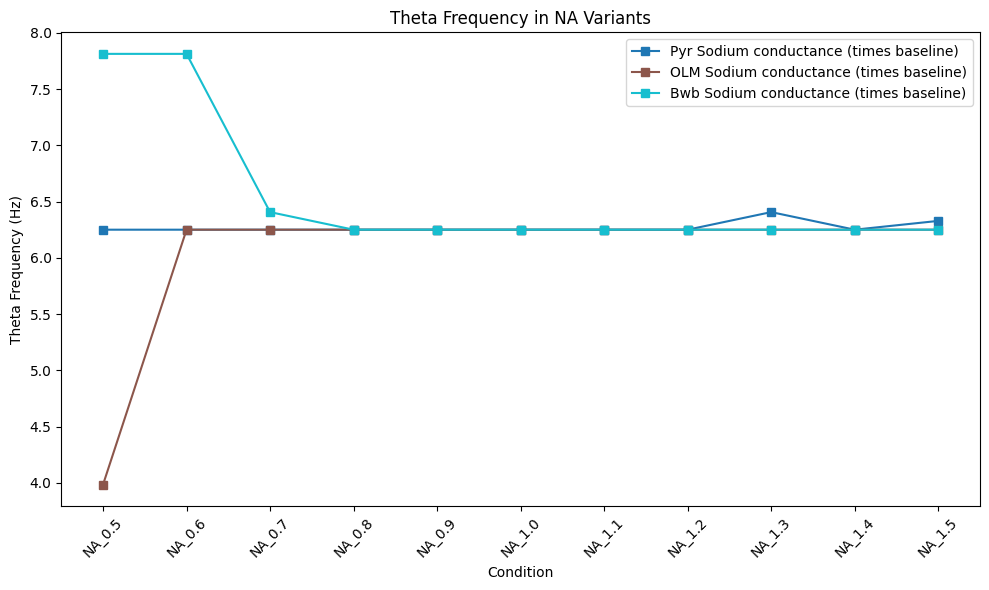

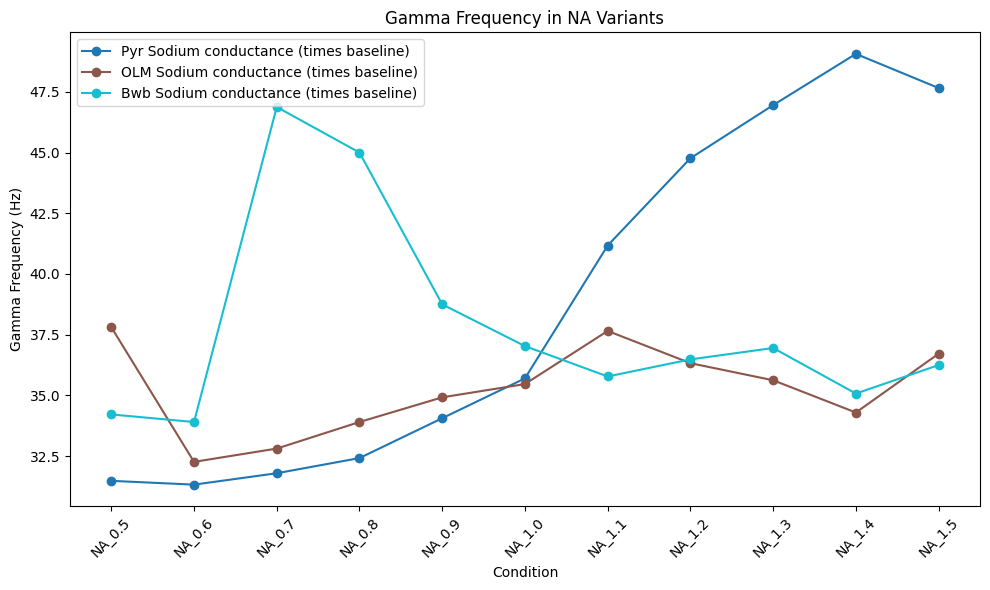

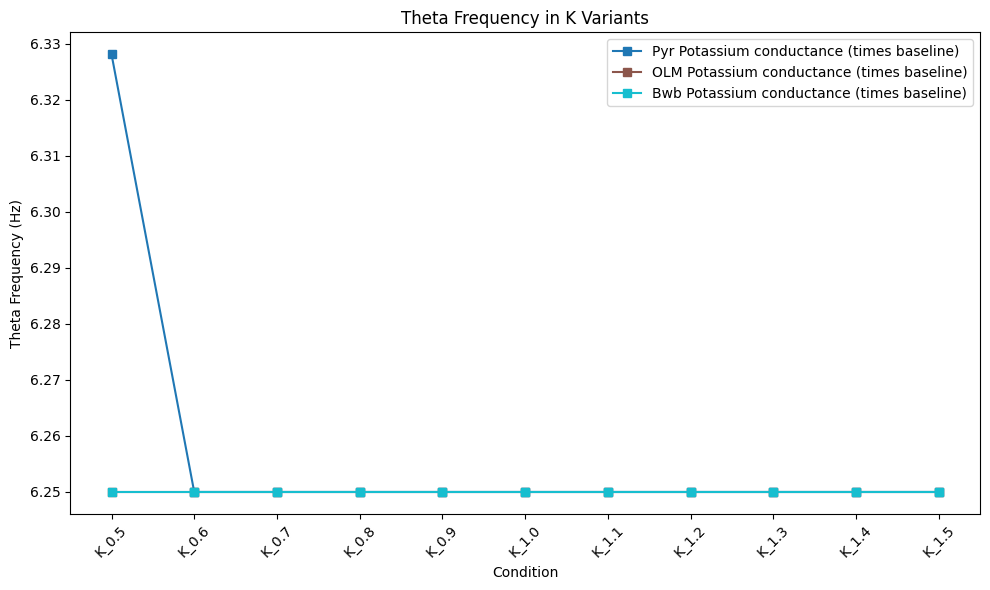

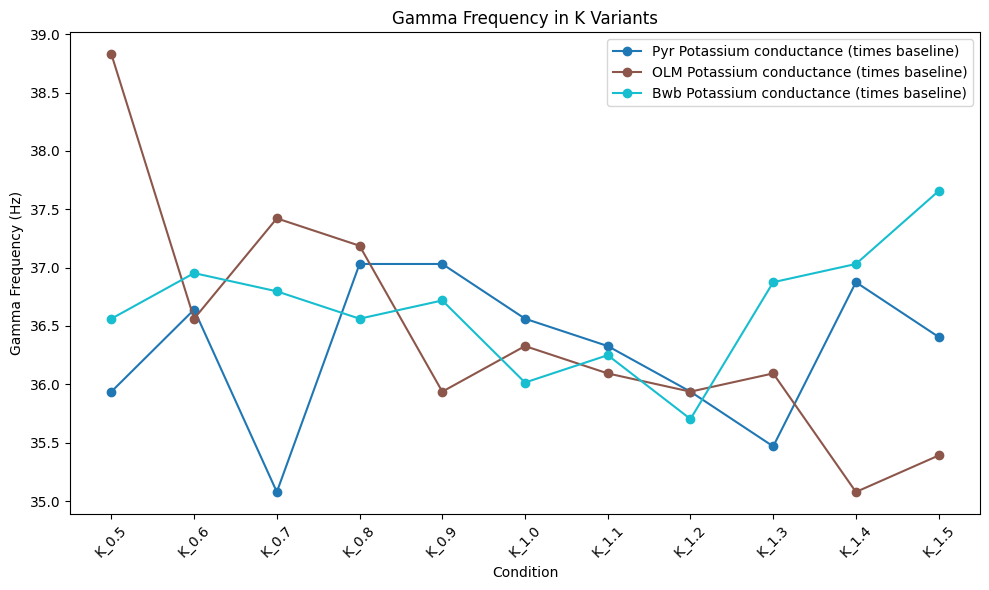

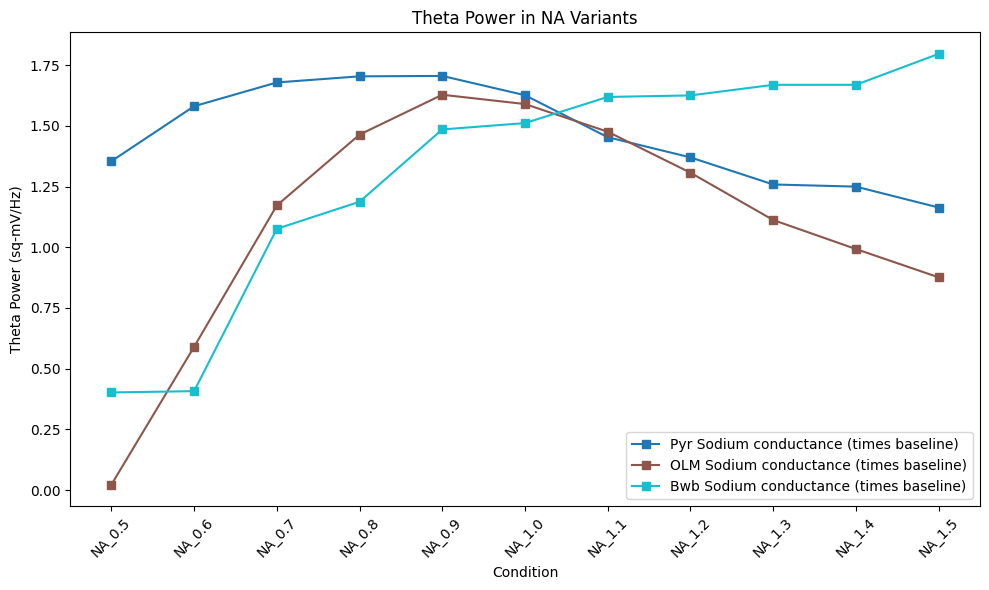

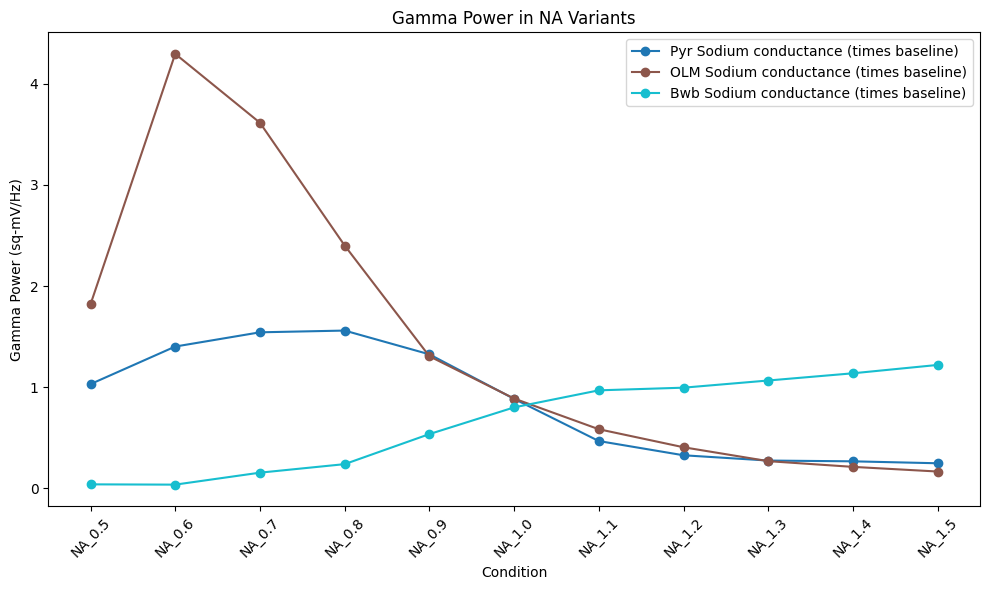

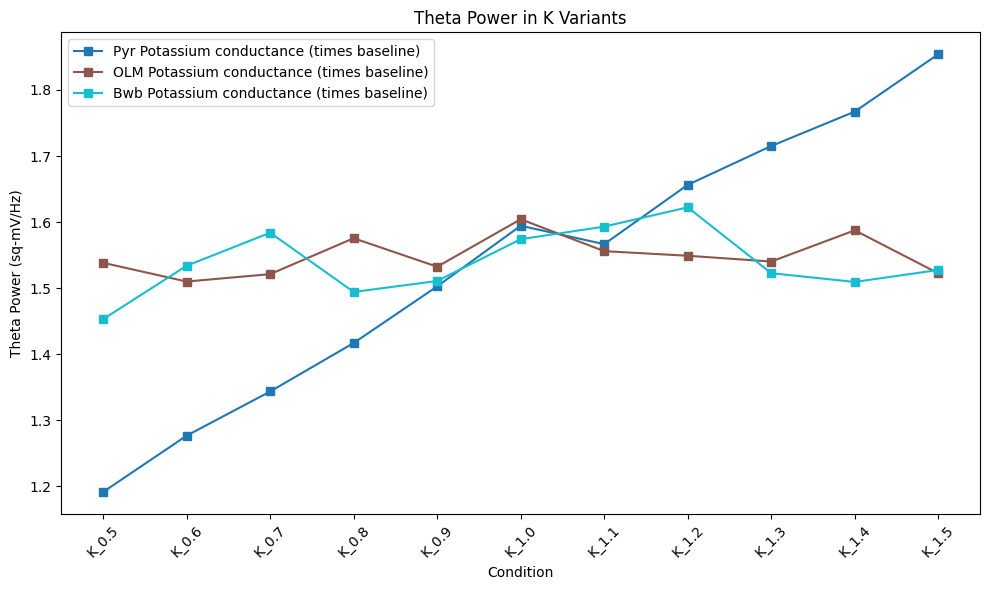

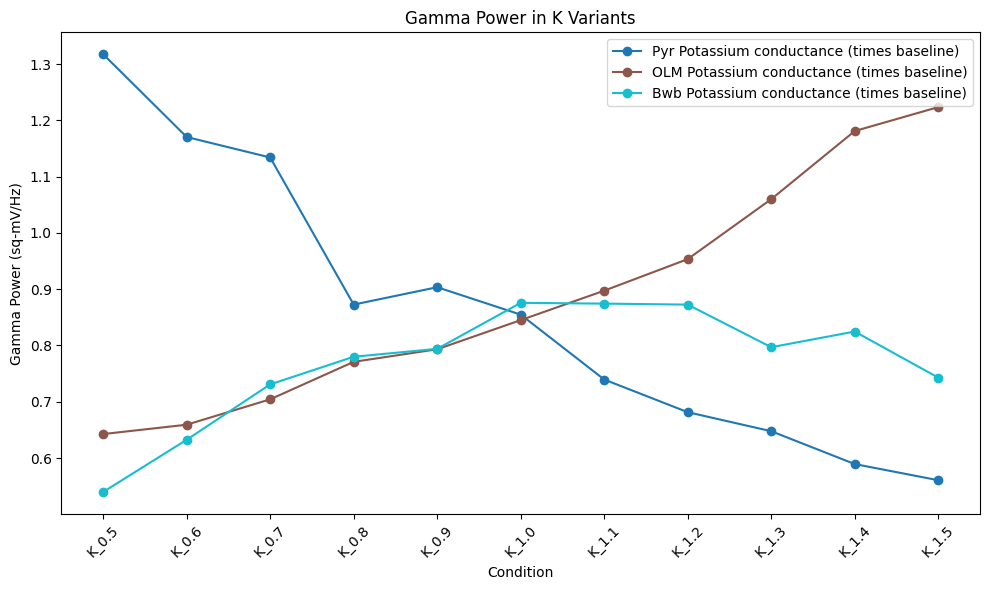

In [6]:
from src.SanjayCode import extract_variant, plot_variant_firing_rates
from src.SanjayCode import plot_separate_cell_type_firing_rates
from src.SanjayCode import plot_frequencies_for_variants
from src.SanjayCode import plot_power_for_variants

# For NA datasets
any_na_dataset_path = list(na_datasets.keys())[0]
# Get any dataset path from NA datasets
na_x_tick_labels = extract_variant(any_na_dataset_path)

# For K datasets
any_k_dataset_path = list(k_datasets.keys())[0]
# Get any dataset path from K datasets
k_x_tick_labels = extract_variant(any_k_dataset_path)

# Plot Firing rates both variants
plot_variant_firing_rates(na_datasets, "NA", na_x_tick_labels)
plot_variant_firing_rates(k_datasets, "K", k_x_tick_labels)

# Plot separate cell type firing rates
plot_separate_cell_type_firing_rates(na_datasets, "NA", na_x_tick_labels)
plot_separate_cell_type_firing_rates(k_datasets, "K", k_x_tick_labels)

# Plot frequencies for variants
plot_frequencies_for_variants(na_datasets, "NA", na_x_tick_labels)
plot_frequencies_for_variants(k_datasets, "K", k_x_tick_labels)

# Plot power for variants
plot_power_for_variants(na_datasets, "NA", na_x_tick_labels)
plot_power_for_variants(k_datasets, "K", k_x_tick_labels)

# Table of results per celltype


In [7]:
from src.SanjayCode import create_dataframe_for_variant
from src.SanjayCode import create_dataframe_for_variant_averaged
from src.SanjayCode import sort_and_group_dataframe
from src.SanjayCode import split_dataframe_by_celltype

# Create the data frames per variant
na_df = create_dataframe_for_variant(na_datasets)
k_df = create_dataframe_for_variant(k_datasets)

# Create the dataframes averaged per condition, per variant
na_df_averaged = create_dataframe_for_variant_averaged(na_datasets)
k_df_averaged = create_dataframe_for_variant_averaged(k_datasets)

# Apply the sorting and grouping function to the DataFrame
na_df_sorted = sort_and_group_dataframe(na_df_averaged)
k_df_sorted = sort_and_group_dataframe(k_df_averaged)

# Split the DataFrame by cell type
# Assuming 'df' is your main DataFrame
na_dfs_dict = split_dataframe_by_celltype(na_df_averaged)
k_df_dict = split_dataframe_by_celltype(k_df_averaged)

# Access the DataFrames for each cell type
# Gets the DataFrame for 'Pyr' or None if not present
na_pyr_df = na_dfs_dict.get("Pyr", None)
k_pyr_df = k_df_dict.get("Pyr", None)

# Gets the DataFrame for 'Bwb' or None if not present
na_bwb_df = na_dfs_dict.get("Bwb", None)
k_bwb_df = k_df_dict.get("Bwb", None)

# Gets the DataFrame for 'OLM' or None if not present
na_olm_df = na_dfs_dict.get("OLM", None)
k_olm_df = k_df_dict.get("OLM", None)

## NA dataframes per celltype


In [8]:
na_pyr_df

Pyr(Hz)+ Pyr (Std) BWB (Hz)+ BWB (Std) OLM (Hz)+ OLM (Std) Theta Freq (Hz)  \
0          1.33+-0.59          8.33+-1.98          0.69+-0.32             6.2   
1          1.47+-0.60          9.16+-1.97          0.79+-0.35             6.2   
2          1.59+-0.61          9.88+-2.08          0.87+-0.35             6.2   
3          1.69+-0.62          9.99+-2.19          0.94+-0.35             6.2   
4          1.77+-0.63          9.74+-2.16          1.00+-0.36             6.2   
5          1.87+-0.60          9.13+-2.26          1.06+-0.36             6.2   
6          2.00+-0.59          8.98+-2.32          1.14+-0.36             6.2   
7          2.11+-0.62          9.08+-2.56          1.23+-0.37             6.2   
8          2.17+-0.65          9.29+-2.67          1.29+-0.38             6.4   
9          2.21+-0.65          9.42+-2.67          1.37+-0.38             6.2   
10         2.25+-0.67          9.60+-2.69          1.41+-0.39             6.3   

   Theta power (mV^2 Hz^-1) Gamma Freq (Hz) Gamma power (mV^2 Hz^-1)  \
0                      1.35            31.5                     1.03   
1                      1.58            31.3                     1.40   
2                      1.68            31.8                     1.54   
3                      1.70            32.4                     1.56   
4                      1.71            34.1                     1.33   
5                      1.63            35.7                     0.89   
6                      1.45            41.2                     0.47   
7                      1.37            44.8                     0.33   
8                      1.26            47.0                     0.28   
9                      1.25            49.1                     0.27   
10                     1.16            47.7                     0.25   

   Modified Celltype  Condition  
0                Pyr        0.5  
1                Pyr        0.6  
2                Pyr        0.7  
3                Pyr        0.8  
4                Pyr        0.9  
5                Pyr        1.0  
6                Pyr        1.1  
7                Pyr        1.2  
8                Pyr        1.3  
9                Pyr        1.4  
10               Pyr        1.5

In [9]:
na_bwb_df

Pyr(Hz)+ Pyr (Std) BWB (Hz)+ BWB (Std) OLM (Hz)+ OLM (Std) Theta Freq (Hz)  \
22         2.80+-0.65          0.00+-0.00          3.07+-0.43             7.8   
23         2.78+-0.65          0.02+-0.06          3.03+-0.44             7.8   
24         2.27+-0.69          3.54+-0.87          1.46+-0.40             6.4   
25         1.96+-0.62          7.37+-2.19          1.13+-0.36             6.2   
26         1.89+-0.60          8.39+-2.38          1.09+-0.36             6.2   
27         1.87+-0.60          9.07+-2.32          1.06+-0.36             6.2   
28         1.85+-0.60          9.57+-2.24          1.05+-0.36             6.2   
29         1.84+-0.59          9.61+-2.20          1.06+-0.36             6.2   
30         1.83+-0.60          9.79+-2.22          1.04+-0.36             6.2   
31         1.83+-0.60         10.08+-2.26          1.03+-0.36             6.2   
32         1.82+-0.59         10.30+-2.17          1.04+-0.35             6.2   

   Theta power (mV^2 Hz^-1) Gamma Freq (Hz) Gamma power (mV^2 Hz^-1)  \
22                     0.40            34.2                     0.04   
23                     0.41            33.9                     0.04   
24                     1.08            46.9                     0.16   
25                     1.19            45.0                     0.24   
26                     1.49            38.8                     0.54   
27                     1.51            37.0                     0.80   
28                     1.62            35.8                     0.97   
29                     1.63            36.5                     1.00   
30                     1.67            37.0                     1.07   
31                     1.67            35.1                     1.14   
32                     1.80            36.2                     1.22   

   Modified Celltype  Condition  
22               Bwb        0.5  
23               Bwb        0.6  
24               Bwb        0.7  
25               Bwb        0.8  
26               Bwb        0.9  
27               Bwb        1.0  
28               Bwb        1.1  
29               Bwb        1.2  
30               Bwb        1.3  
31               Bwb        1.4  
32               Bwb        1.5

In [10]:
na_olm_df

Pyr(Hz)+ Pyr (Std) BWB (Hz)+ BWB (Std) OLM (Hz)+ OLM (Std) Theta Freq (Hz)  \
11         3.79+-1.00         18.76+-3.77          0.01+-0.03             4.0   
12         3.22+-0.89         21.74+-2.41          0.23+-0.21             6.2   
13         2.79+-0.80         18.51+-2.38          0.42+-0.26             6.2   
14         2.45+-0.72         14.57+-2.40          0.62+-0.31             6.2   
15         2.14+-0.67         11.20+-2.41          0.84+-0.34             6.2   
16         1.87+-0.61          9.15+-2.26          1.06+-0.36             6.2   
17         1.61+-0.55          7.49+-2.03          1.31+-0.38             6.2   
18         1.36+-0.50          6.29+-1.84          1.60+-0.39             6.2   
19         1.11+-0.45          4.98+-1.61          1.98+-0.39             6.2   
20         0.90+-0.40          4.01+-1.38          2.49+-0.37             6.2   
21         0.75+-0.36          3.31+-1.20          3.02+-0.35             6.2   

   Theta power (mV^2 Hz^-1) Gamma Freq (Hz) Gamma power (mV^2 Hz^-1)  \
11                     0.02            37.8                     1.82   
12                     0.59            32.3                     4.29   
13                     1.17            32.8                     3.61   
14                     1.46            33.9                     2.40   
15                     1.63            34.9                     1.31   
16                     1.59            35.5                     0.89   
17                     1.48            37.7                     0.59   
18                     1.31            36.3                     0.41   
19                     1.11            35.6                     0.27   
20                     0.99            34.3                     0.21   
21                     0.88            36.7                     0.17   

   Modified Celltype  Condition  
11               OLM        0.5  
12               OLM        0.6  
13               OLM        0.7  
14               OLM        0.8  
15               OLM        0.9  
16               OLM        1.0  
17               OLM        1.1  
18               OLM        1.2  
19               OLM        1.3  
20               OLM        1.4  
21               OLM        1.5

In [11]:
import os

# Directory to save files
directory_path = "../Tables/Sodium_variants"

# Check if the directory exists and create it if not
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# List of tuples (DataFrame, filename)
dataframes_and_filenames = [
    (na_pyr_df, "na_pyr_df.csv"),
    (na_bwb_df, "na_bwb_df.csv"),
    (na_olm_df, "na_olm_df.csv"),
]

# Iterate and save each DataFrame
for df, filename in dataframes_and_filenames:
    full_path = f"{directory_path}/{filename}"
    df.to_csv(full_path, index=False)

## K variants per celltype


In [12]:
k_pyr_df

Pyr(Hz)+ Pyr (Std) BWB (Hz)+ BWB (Std) OLM (Hz)+ OLM (Std) Theta Freq (Hz)  \
0          2.15+-0.64         10.75+-2.43          1.32+-0.37             6.3   
1          2.05+-0.63         10.04+-2.34          1.25+-0.37             6.2   
2          1.97+-0.63          9.74+-2.33          1.14+-0.37             6.2   
3          1.93+-0.62          9.32+-2.48          1.11+-0.37             6.2   
4          1.90+-0.62          9.31+-2.29          1.08+-0.37             6.2   
5          1.86+-0.59          9.03+-2.24          1.07+-0.36             6.2   
6          1.83+-0.59          8.83+-2.26          1.05+-0.36             6.2   
7          1.79+-0.58          8.63+-2.17          1.03+-0.35             6.2   
8          1.75+-0.56          8.36+-2.16          1.02+-0.35             6.2   
9          1.72+-0.56          8.18+-2.04          1.00+-0.35             6.2   
10         1.68+-0.54          7.99+-2.08          0.99+-0.35             6.2   

   Theta power (mV^2 Hz^-1) Gamma Freq (Hz) Gamma power (mV^2 Hz^-1)  \
0                      1.19            35.9                     1.32   
1                      1.28            36.6                     1.17   
2                      1.34            35.1                     1.13   
3                      1.42            37.0                     0.87   
4                      1.50            37.0                     0.90   
5                      1.59            36.6                     0.85   
6                      1.57            36.3                     0.74   
7                      1.66            35.9                     0.68   
8                      1.72            35.5                     0.65   
9                      1.77            36.9                     0.59   
10                     1.85            36.4                     0.56   

   Modified Celltype  Condition  
0                Pyr        0.5  
1                Pyr        0.6  
2                Pyr        0.7  
3                Pyr        0.8  
4                Pyr        0.9  
5                Pyr        1.0  
6                Pyr        1.1  
7                Pyr        1.2  
8                Pyr        1.3  
9                Pyr        1.4  
10               Pyr        1.5

In [13]:
k_bwb_df

Pyr(Hz)+ Pyr (Std) BWB (Hz)+ BWB (Std) OLM (Hz)+ OLM (Std) Theta Freq (Hz)  \
22         1.85+-0.58          9.19+-2.77          1.06+-0.36             6.2   
23         1.86+-0.59          9.11+-2.77          1.06+-0.36             6.2   
24         1.86+-0.60          9.12+-2.45          1.06+-0.36             6.2   
25         1.86+-0.60          9.06+-2.33          1.07+-0.36             6.2   
26         1.86+-0.60          8.94+-2.28          1.06+-0.36             6.2   
27         1.86+-0.60          9.07+-2.30          1.07+-0.36             6.2   
28         1.87+-0.60          9.07+-2.22          1.07+-0.36             6.2   
29         1.87+-0.61          9.03+-2.30          1.07+-0.38             6.2   
30         1.88+-0.61          8.93+-2.27          1.06+-0.36             6.2   
31         1.88+-0.61          8.86+-2.18          1.07+-0.36             6.2   
32         1.87+-0.61          8.71+-2.17          1.09+-0.36             6.2   

   Theta power (mV^2 Hz^-1) Gamma Freq (Hz) Gamma power (mV^2 Hz^-1)  \
22                     1.45            36.6                     0.54   
23                     1.53            37.0                     0.63   
24                     1.58            36.8                     0.73   
25                     1.49            36.6                     0.78   
26                     1.51            36.7                     0.79   
27                     1.57            36.0                     0.88   
28                     1.59            36.2                     0.87   
29                     1.62            35.7                     0.87   
30                     1.52            36.9                     0.80   
31                     1.51            37.0                     0.82   
32                     1.53            37.7                     0.74   

   Modified Celltype  Condition  
22               Bwb        0.5  
23               Bwb        0.6  
24               Bwb        0.7  
25               Bwb        0.8  
26               Bwb        0.9  
27               Bwb        1.0  
28               Bwb        1.1  
29               Bwb        1.2  
30               Bwb        1.3  
31               Bwb        1.4  
32               Bwb        1.5

In [14]:
k_olm_df

Pyr(Hz)+ Pyr (Std) BWB (Hz)+ BWB (Std) OLM (Hz)+ OLM (Std) Theta Freq (Hz)  \
11         1.70+-0.57          8.01+-2.16          1.23+-0.36             6.2   
12         1.73+-0.58          8.21+-2.13          1.19+-0.36             6.2   
13         1.76+-0.58          8.34+-2.32          1.17+-0.37             6.2   
14         1.79+-0.58          8.58+-2.17          1.14+-0.36             6.2   
15         1.83+-0.59          8.81+-2.26          1.10+-0.36             6.2   
16         1.87+-0.60          9.20+-2.26          1.07+-0.36             6.2   
17         1.90+-0.61          9.40+-2.28          1.03+-0.36             6.2   
18         1.94+-0.61          9.58+-2.30          1.00+-0.35             6.2   
19         1.98+-0.63          9.99+-2.44          0.96+-0.36             6.2   
20         2.02+-0.63         10.27+-2.30          0.93+-0.35             6.2   
21         2.06+-0.65         10.66+-2.39          0.89+-0.35             6.2   

   Theta power (mV^2 Hz^-1) Gamma Freq (Hz) Gamma power (mV^2 Hz^-1)  \
11                     1.54            38.8                     0.64   
12                     1.51            36.6                     0.66   
13                     1.52            37.4                     0.70   
14                     1.58            37.2                     0.77   
15                     1.53            35.9                     0.79   
16                     1.60            36.3                     0.84   
17                     1.56            36.1                     0.90   
18                     1.55            35.9                     0.95   
19                     1.54            36.1                     1.06   
20                     1.59            35.1                     1.18   
21                     1.52            35.4                     1.22   

   Modified Celltype  Condition  
11               OLM        0.5  
12               OLM        0.6  
13               OLM        0.7  
14               OLM        0.8  
15               OLM        0.9  
16               OLM        1.0  
17               OLM        1.1  
18               OLM        1.2  
19               OLM        1.3  
20               OLM        1.4  
21               OLM        1.5

In [15]:
# Directory to save files
directory_path = "../Tables/Potassium_variants"

# Check if the directory exists and create it if not
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# List of tuples (DataFrame, filename)
dataframes_and_filenames = [
    (k_pyr_df, "k_pyr_df.csv"),
    (k_bwb_df, "k_bwb_df.csv"),
    (k_olm_df, "k_olm_df.csv"),
]

# Iterate and save each DataFrame
for df, filename in dataframes_and_filenames:
    full_path = f"{directory_path}/{filename}"
    df.to_csv(full_path, index=False)

# Grid plots


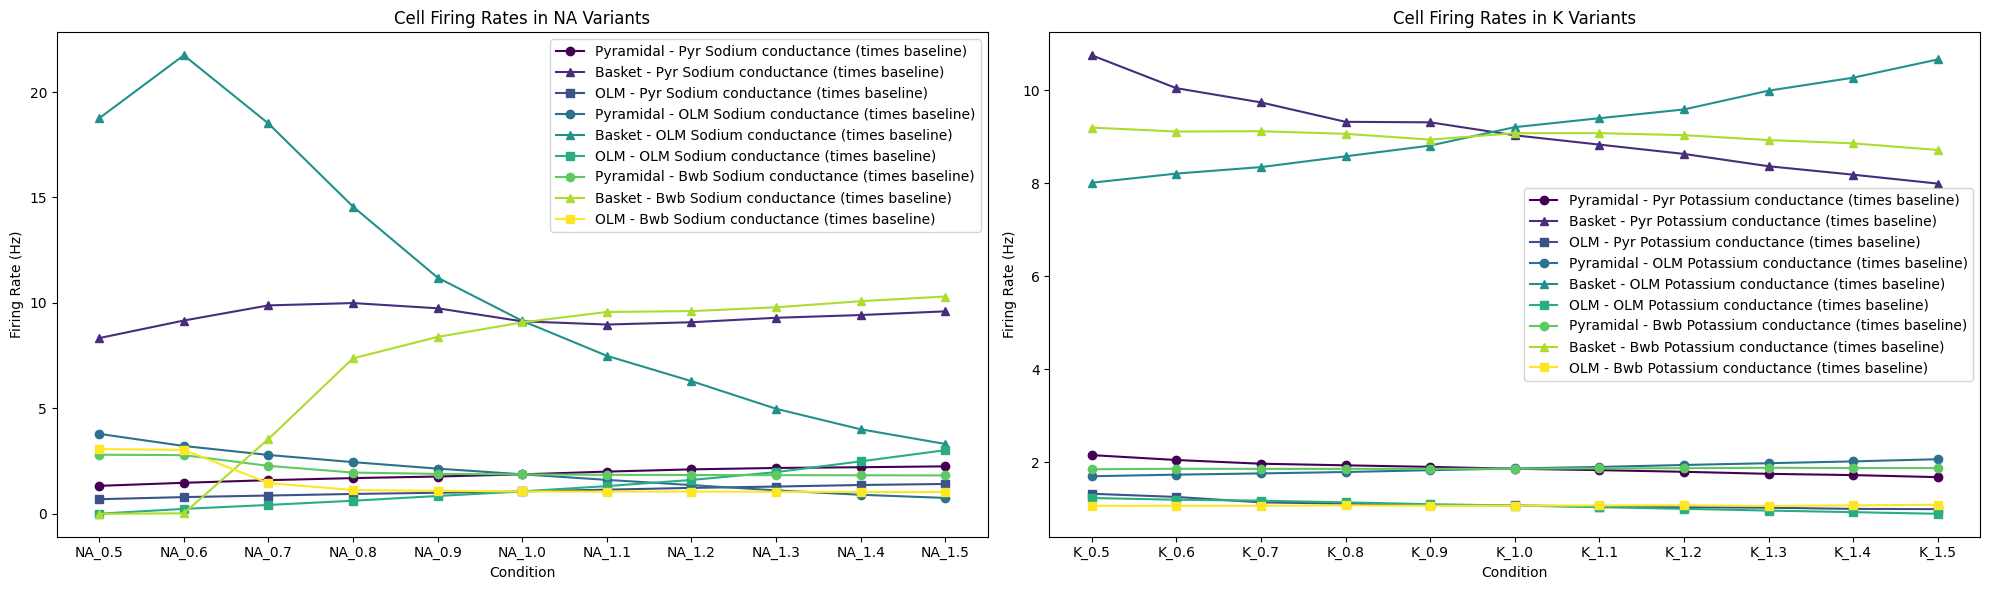

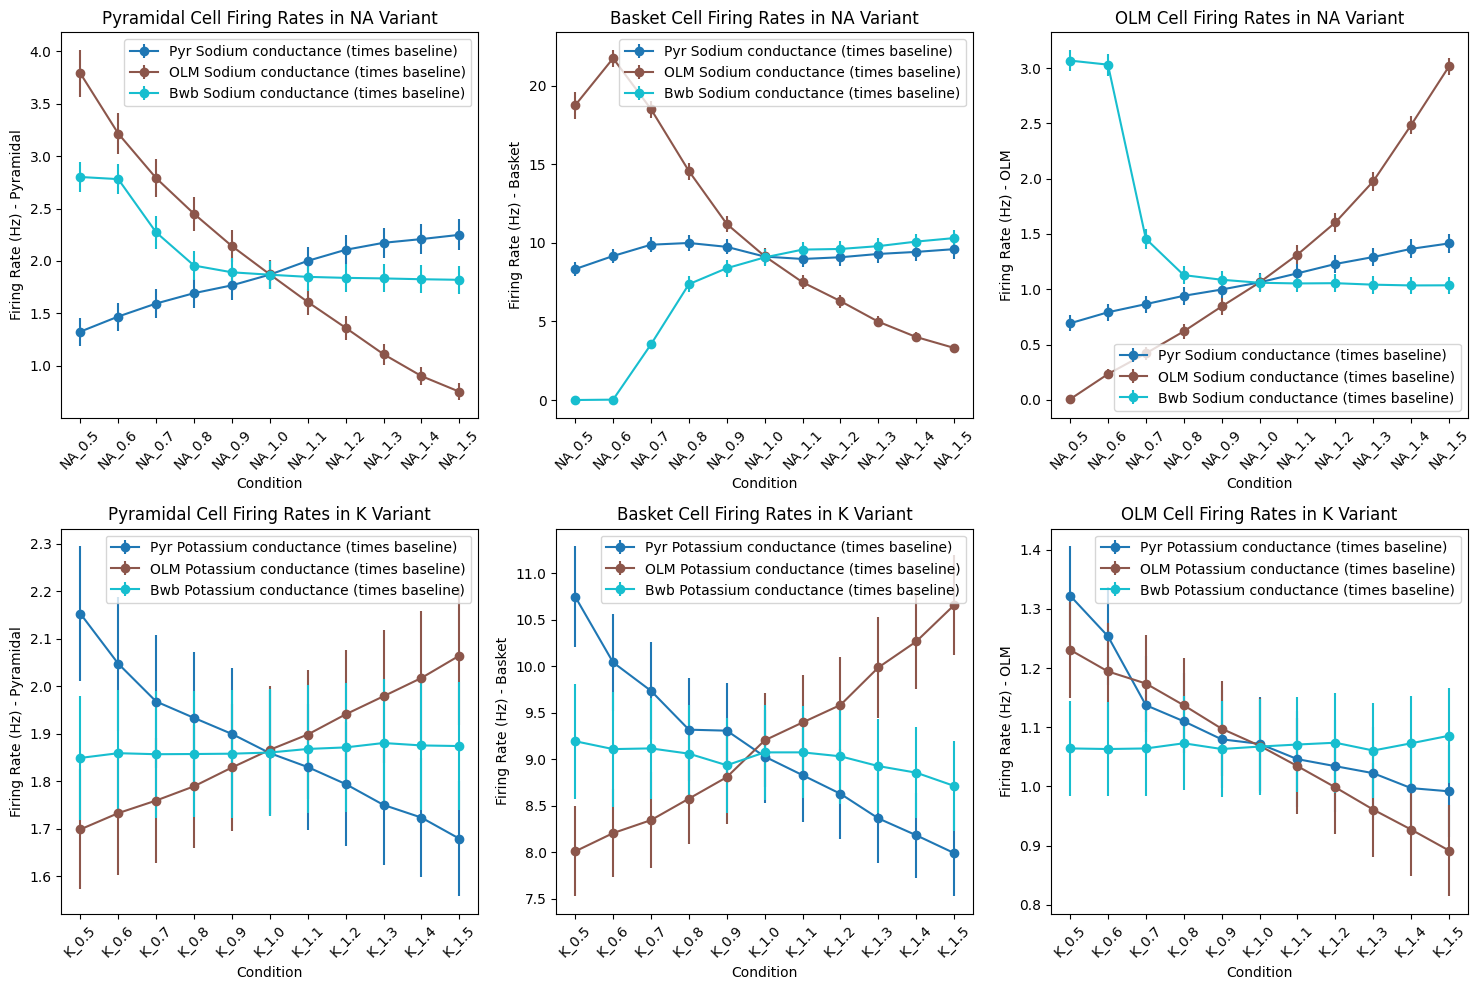

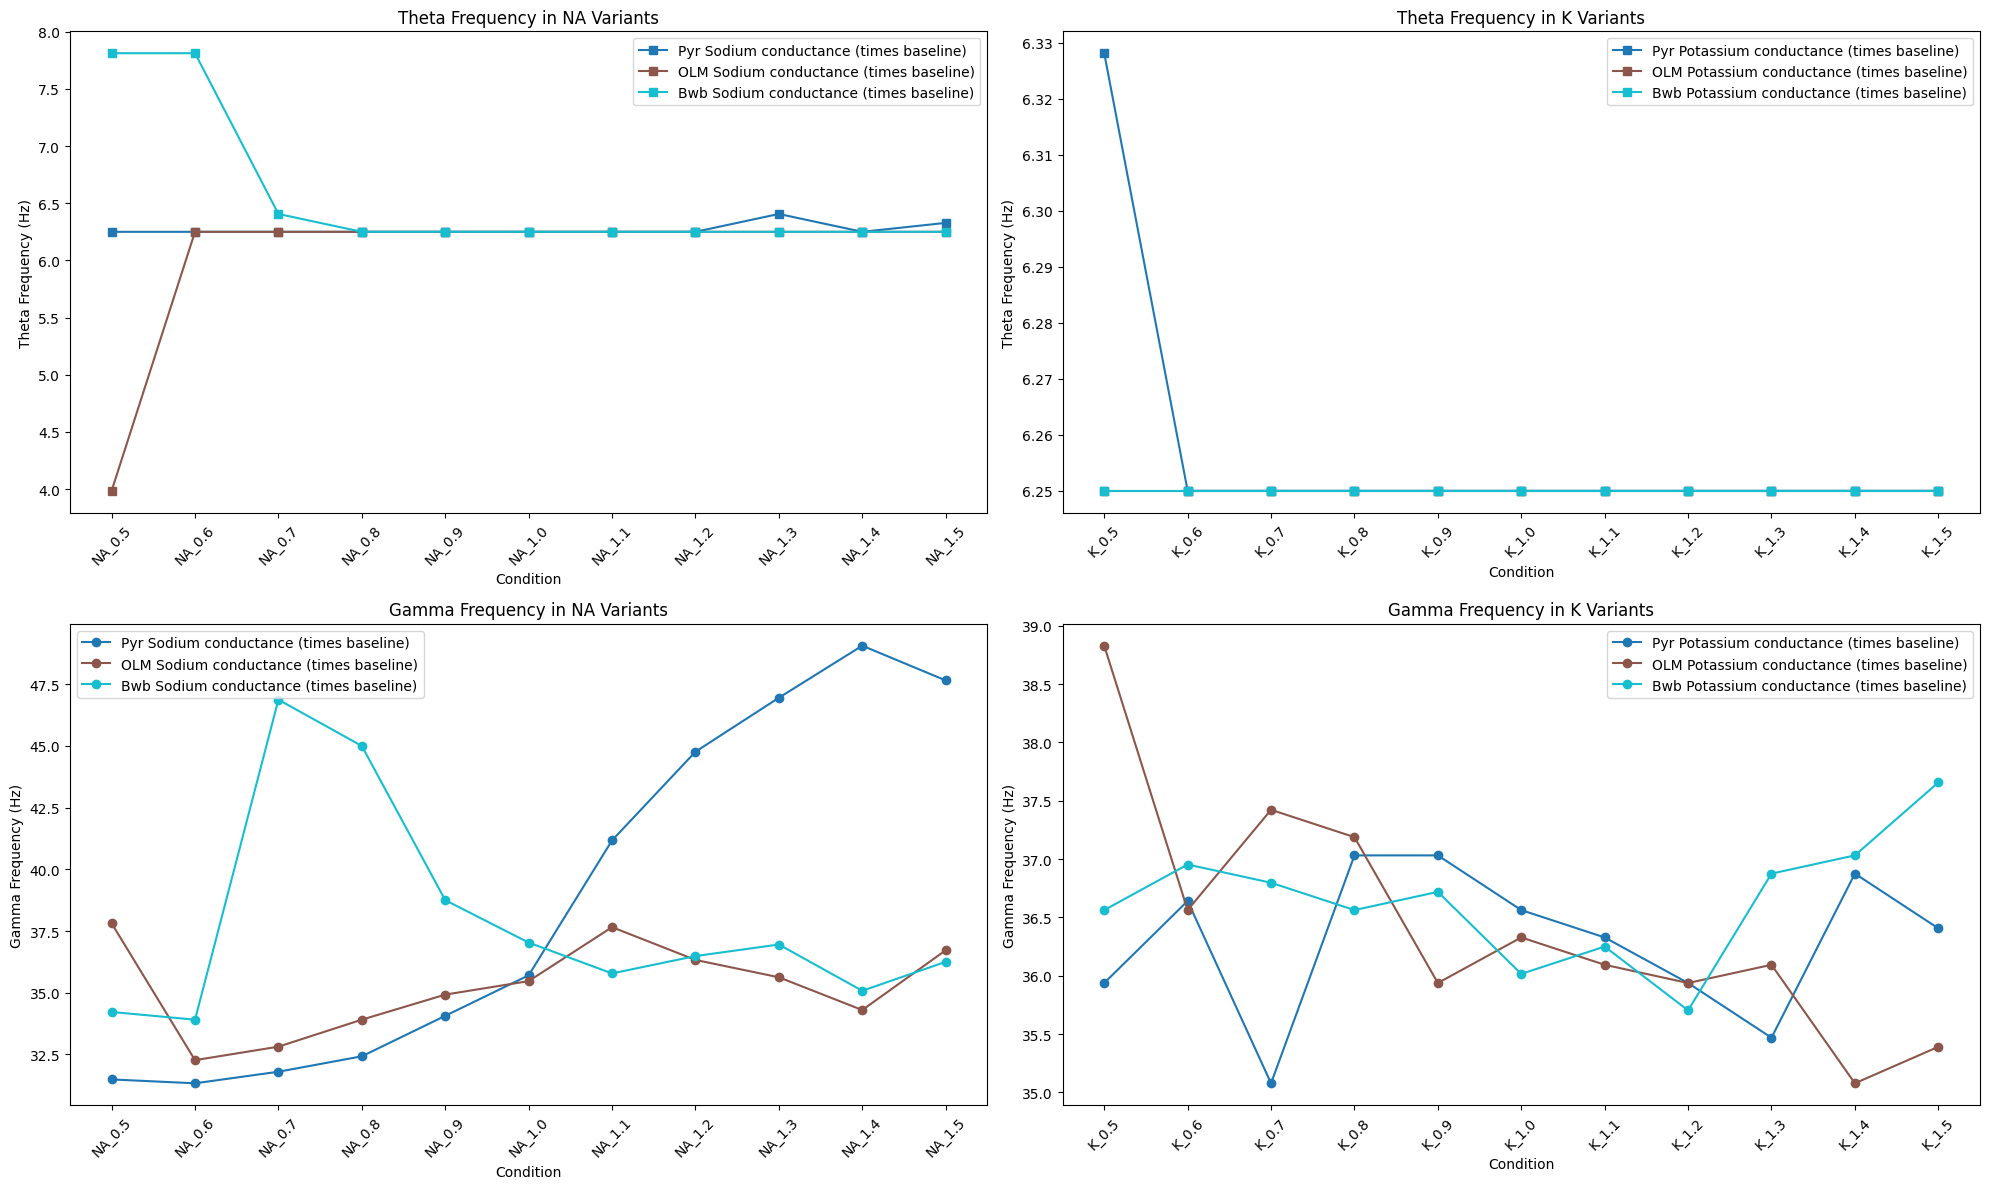

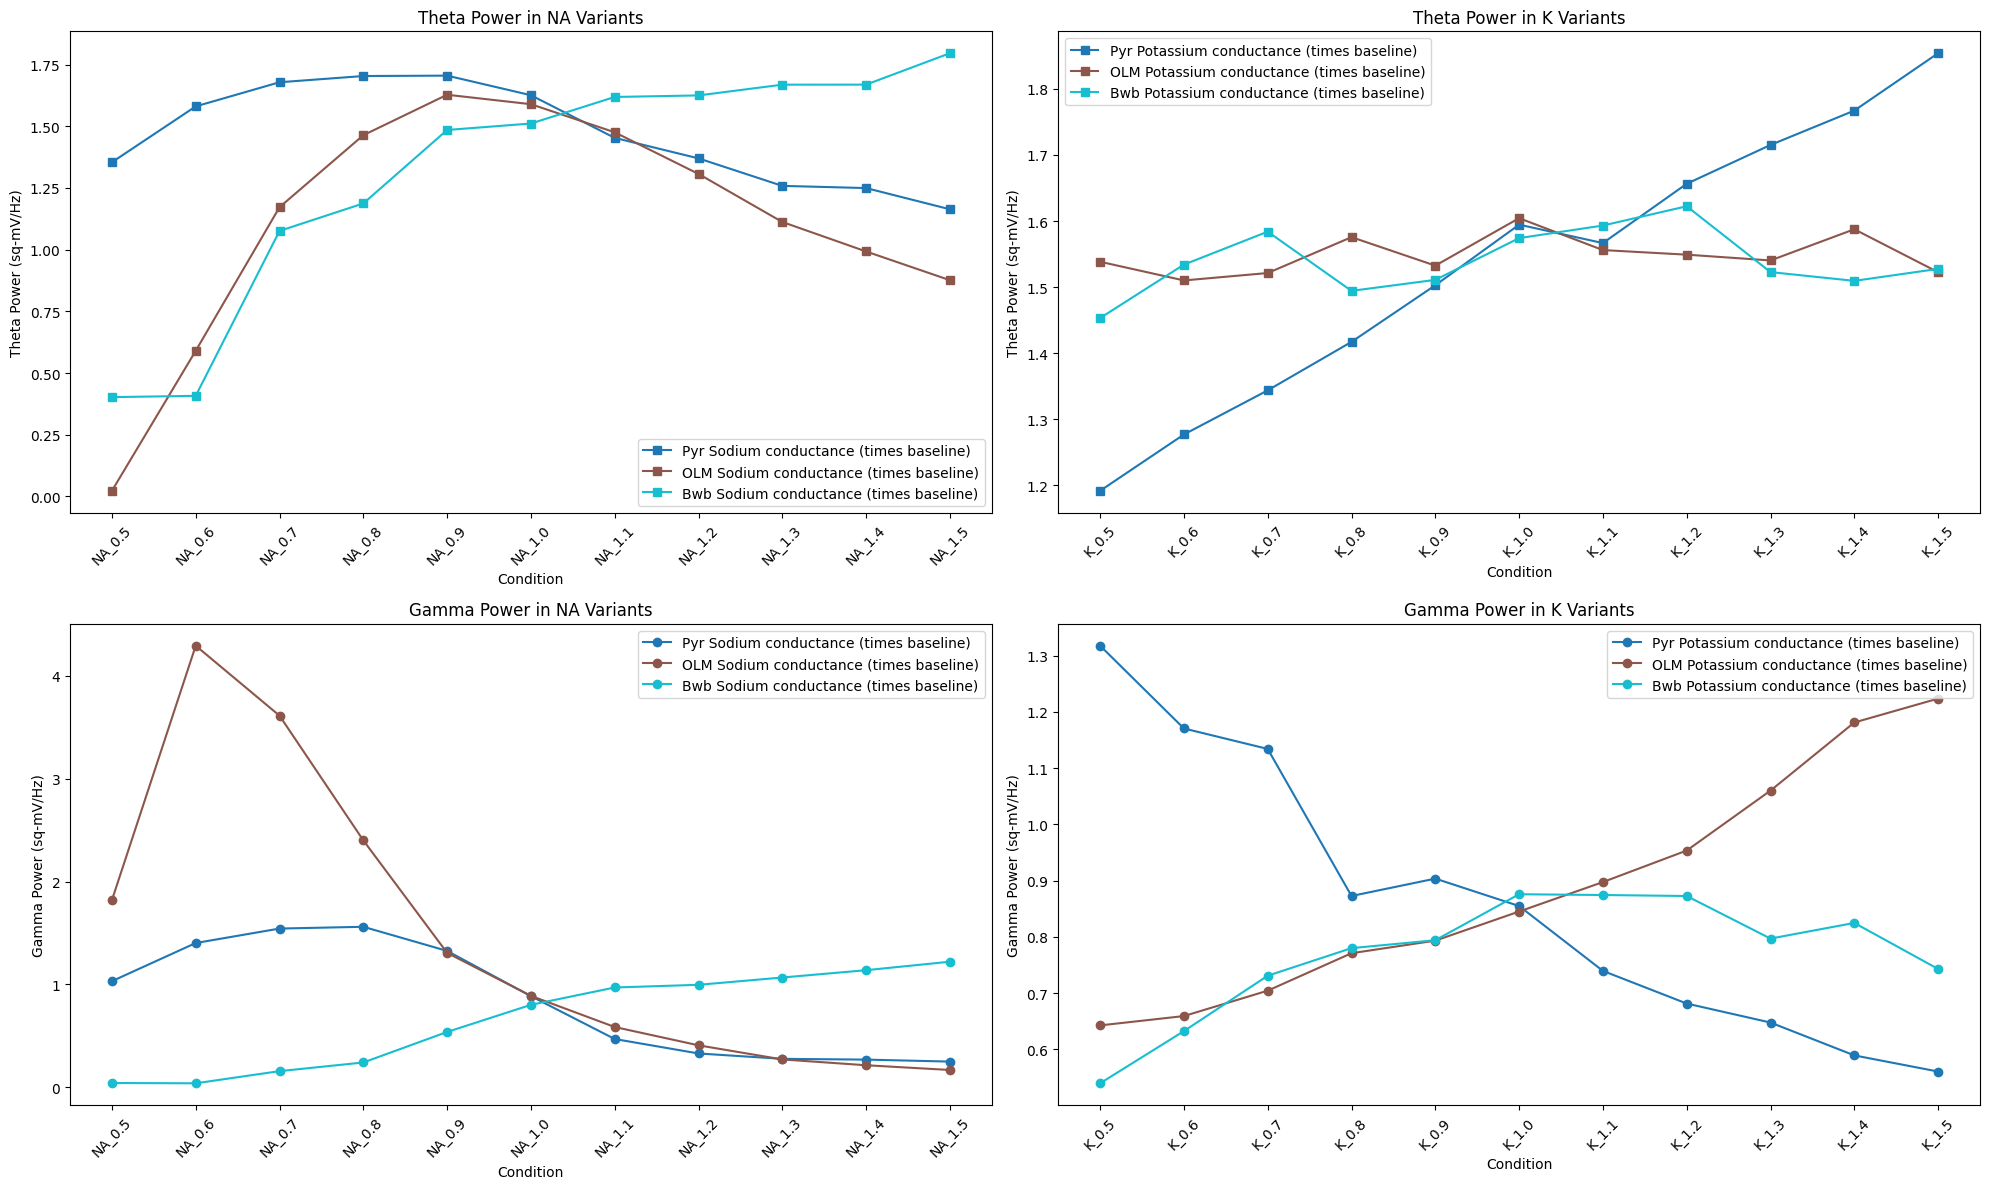

In [27]:
from src.SanjayCode import plot_variant_firing_rates_grid
from src.SanjayCode import plot_separate_cell_type_firing_rates_grid
from src.SanjayCode import plot_frequencies_for_variants_grid
from src.SanjayCode import plot_power_for_variants_grid

variant_results_dict = {"NA": na_datasets, "K": k_datasets}

# Plot firing rates per variant in a grid
plot_variant_firing_rates_grid(variant_results_dict)

# add x_tick_labels to the dictionary
variant_results_dict = {
    "NA": (na_datasets, na_x_tick_labels),
    "K": (k_datasets, k_x_tick_labels),
}

# Plot firing rates per cell type in a grid
plot_separate_cell_type_firing_rates_grid(variant_results_dict)

# Plot frequencies for variants in a grid
plot_frequencies_for_variants_grid(variant_results_dict)

# Plot power for variants in a grid
plot_power_for_variants_grid(variant_results_dict)

# Fourier Transform of LFP


In [17]:
# from src.SanjayCode import plot_fft_lfp

# SINGLE TRIAL
# # Sampling rate default for Sanjay model


# lfps = na_datasets["../data/Data05_Pyr_NA_Variants/"]["NA_1.0"]["01"]["lfps"][0] # always 1st index
# plot_fft_lfp(lfps, sampling_rate)

In [18]:
# AVERAGE OVER TRIALS for pyr
from src.SanjayCode import plot_average_fft_lfp

sampling_rate = 10000

# Example usage
variant_key = (
    "../data/Data05_Pyr_NA_Variants/"  # does not matter which population baseline.
)
condition_key = "NA_1.0"
plot_average_fft_lfp(na_datasets, variant_key, condition_key, sampling_rate)

KeyError: '../data/Data05_Pyr_NA_Variants/'

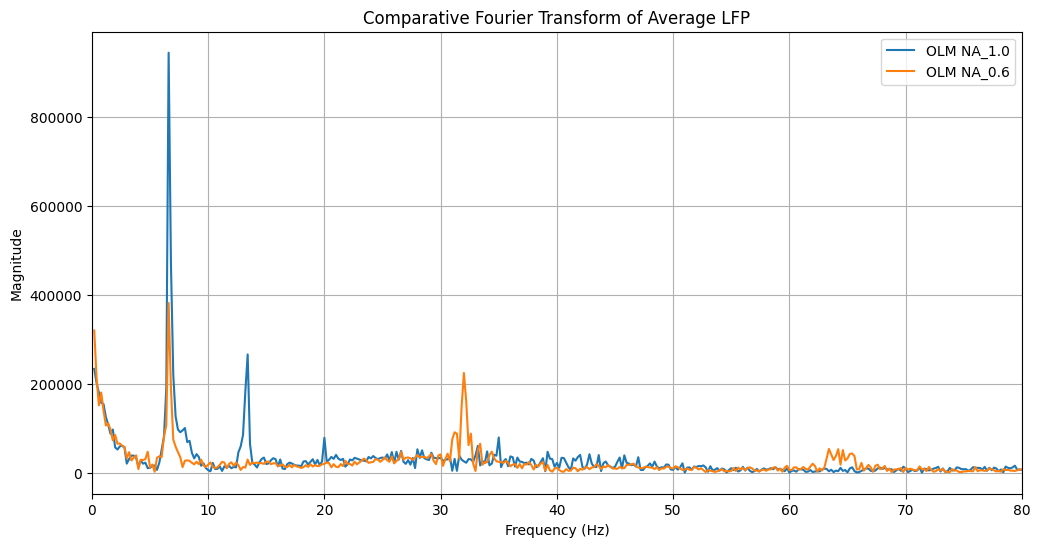

In [ ]:
# Compare OLM variant conditions
from src.SanjayCode import plot_comparative_ffts

# Example usage
baseline_variant_key = "../data/Data07_OLM_NA_Variants"
comparison_variant_keys = [
    "../data/Data07_OLM_NA_Variants",
]
baseline_condition = "NA_1.0"
comparison_condition = [
    "NA_0.6"
]  # can add multiple conditons from 0.5 to 1.5 or just plot 1.
plot_comparative_ffts(
    na_datasets,
    baseline_variant_key,
    comparison_variant_keys,
    baseline_condition,
    comparison_condition,
    sampling_rate,
)

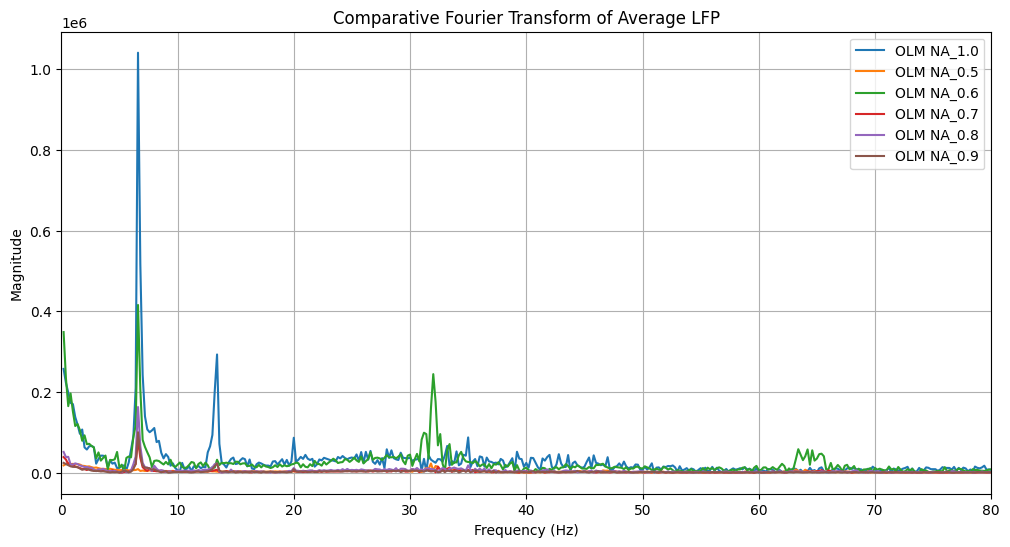

In [ ]:
# Compare OLM variant conditions
from src.SanjayCode import plot_comparative_ffts

# Example usage
baseline_variant_key = "../data/Data07_OLM_NA_Variants"
comparison_variant_keys = [
    "../data/Data07_OLM_NA_Variants",
]
baseline_condition = "NA_1.0"
comparison_condition = [
    "NA_0.5",
    "NA_0.6",
    "NA_0.7",
    "NA_0.8",
    "NA_0.9",
]  # can add multiple conditons from 0.5 to 1.5 or just plot 1.
plot_comparative_ffts(
    na_datasets,
    baseline_variant_key,
    comparison_variant_keys,
    baseline_condition,
    comparison_condition,
    sampling_rate,
)

# Average Power Spectrum Density


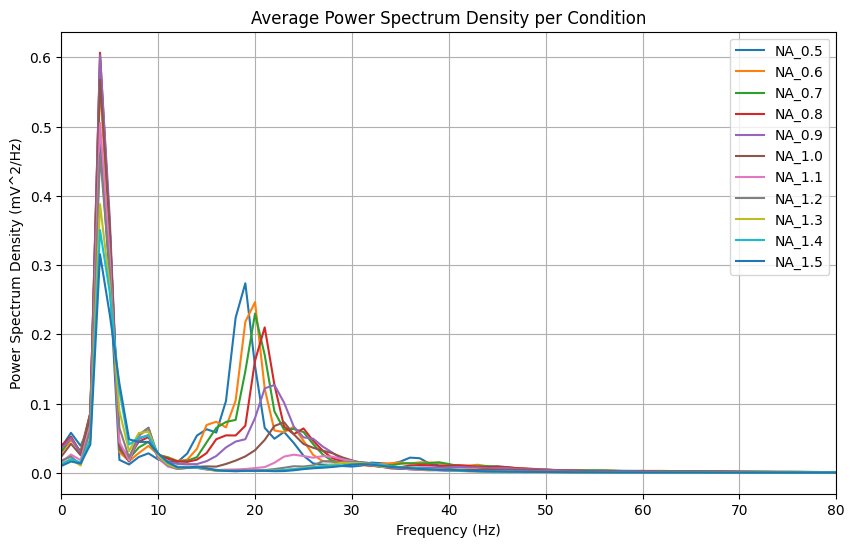

In [ ]:
from src.SanjayCode.SanjaySpectrals import plot_average_psd

plot_average_psd(na_datasets["../data/Data05_Pyr_NA_Variants/"])

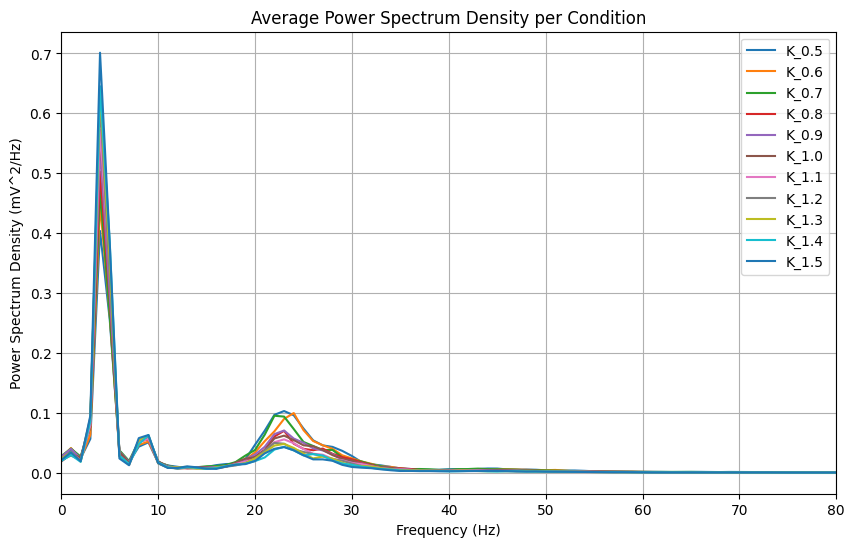

In [ ]:
plot_average_psd(k_datasets["../data/Data06_Pyr_K_Variants"])

# Network Spike rasterplot


In [ ]:
import pickle

# Path to the pickle file
pkl_path_1 = "../data/Data07_OLM_NA_Variants/NA_1.0/00.pkl"  # Baseline NA OLM
pkl_path_2 = "../data/Data07_OLM_NA_Variants/NA_0.6/00.pkl"  # 0.6x NA OLM
pkl_path_3 = "../data/Data07_OLM_NA_Variants/NA_1.4/00.pkl"  # 1.4x NA OLM

# Load the pickle file
# load path 1
try:
    with open(pkl_path_1, "rb") as file:
        data_olm_baseline = pickle.load(file)
    print("Data loaded successfully.")
except Exception as e:
    print("Error loading the file:", e)

# load path 2
try:
    with open(pkl_path_2, "rb") as file:
        data_olm_variant_1 = pickle.load(file)
    print("Data loaded successfully.")
except Exception as e:
    print("Error loading the file:", e)

# load path 3
try:
    with open(pkl_path_3, "rb") as file:
        data_olm_variant_2 = pickle.load(file)
    print("Data loaded successfully.")
except Exception as e:
    print("Error loading the file:", e)

numprocs=1
Data loaded successfully.
Data loaded successfully.
Data loaded successfully.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def scatter_plot(simData: dict):
    colors = {"Pyr": "blue", "Olm": "red", "Bwb": "green"}

    plt.figure(figsize=(13, 8))
    gids = {"Pyr": range(800), "Bwb": range(800, 1000), "Olm": range(1000, 1200)}
    for k, color in colors.items():
        xs = []
        ys = []
        for gid in gids[k]:
            st = simData[gid].spike_times
            xs.extend(st)
            ys.extend(np.ones_like(st) + gid)
        plt.scatter(xs, ys, color=color, marker=",", s=1, alpha=1.0)
    plt.title("Pyr-blue | OLM-red | Bwb-green")

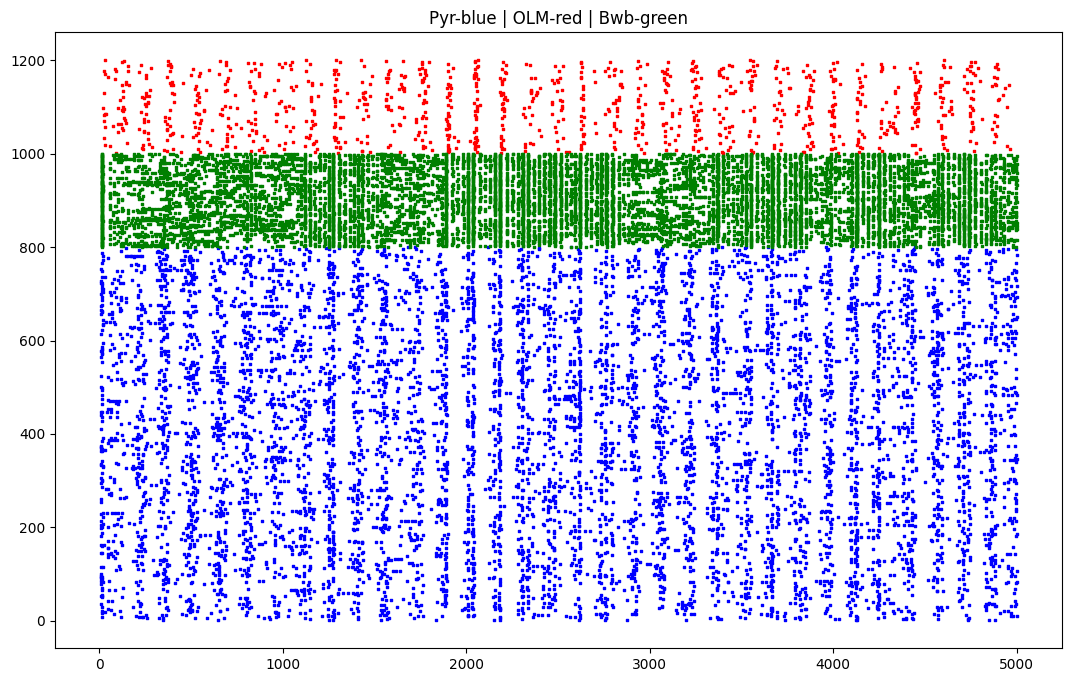

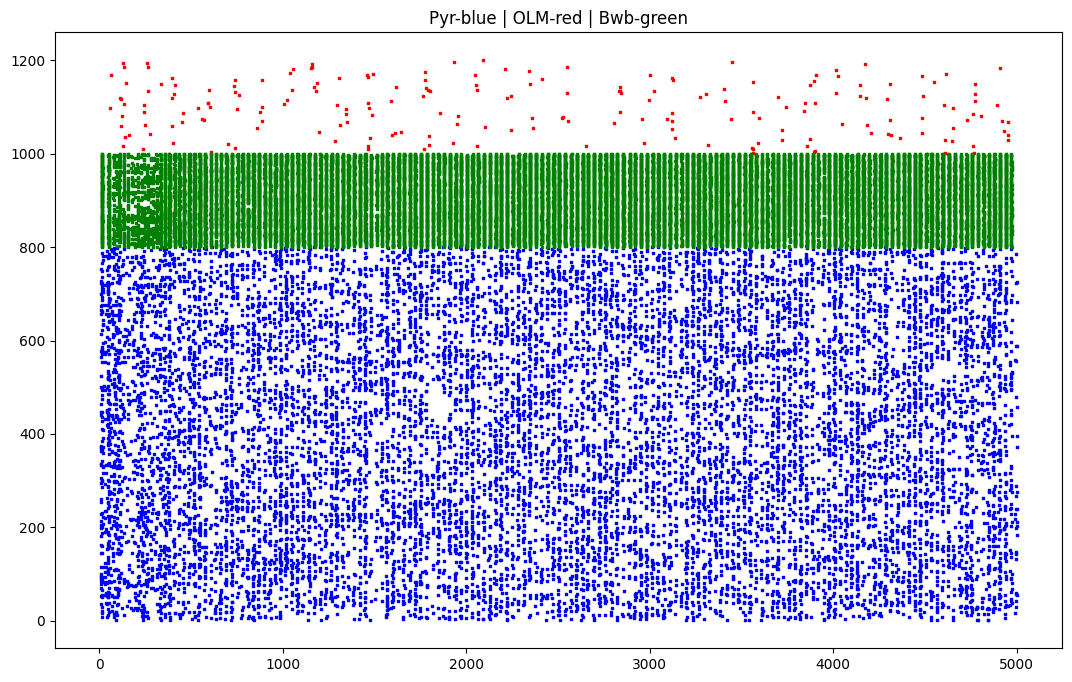

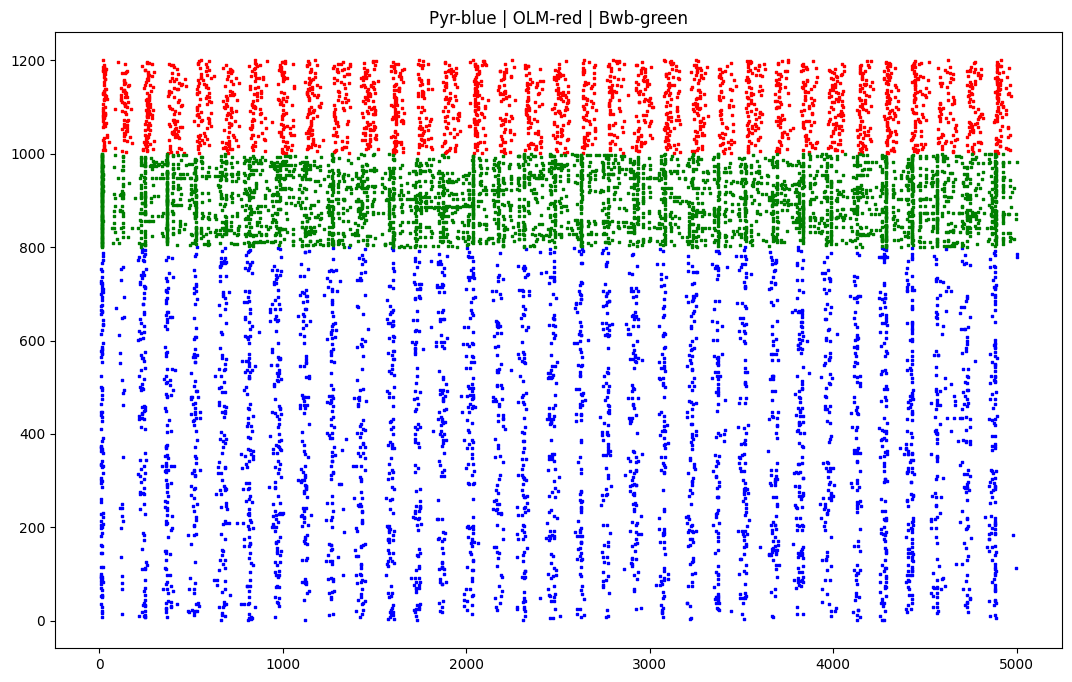

In [ ]:
scatter_plot(data_olm_baseline["simData"])  # OLM_NA_1.0 population activity
scatter_plot(data_olm_variant_1["simData"])  # OLM_NA_0.6 population activity
scatter_plot(data_olm_variant_2["simData"])  # OLM_NA_1.4 population activity